In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Get the current working directory
#cwd = os.getcwd()
cwd = 'c:/Users/rensw/OneDrive - Universiteit Utrecht/GIMA/Thesis - Buitenland/Thesis/Data/Raw_data/Administrative_Boundaries'

# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: c:/Users/rensw/OneDrive - Universiteit Utrecht/GIMA/Thesis - Buitenland/Thesis/Data/Raw_data/Administrative_Boundaries


In [3]:
# read Shapefiles into GeoDataframe
#file = cwd + "\interim\AdministrativeBoundaries_Total_InterimData_16112022.shp"
file = cwd + '/interim/AdministrativeBoundaries_AutonomousCommunity_InterimData_14112022.shp'
shp = gpd.read_file(file)

# check the GeoDataframe
shp.head()


,gml_id,nationalCo,localId,namespace,LocalisedC,language,sourceOfNa,pronunciat,text,script,transliter,residenceO,beginLifes,endLifespa,condominiu,administer,coAdminist,geometry
0,AU_ADMINISTRATIVEUNIT_34010000000,34010000000,34010000000,ES.IGN.BDDAE,Comunidad autónoma,None,None,None,Andalucía,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-6.31760 36.52880, -6.31759 36..."
1,AU_ADMINISTRATIVEUNIT_34020000000,34020000000,34020000000,ES.IGN.BDDAE,Comunidad autónoma,None,None,None,Aragón,None,None,None,None,None,None,None,None,"POLYGON ((-1.68752 40.57939, -1.68582 40.57991..."
2,AU_ADMINISTRATIVEUNIT_34030000000,34030000000,34030000000,ES.IGN.BDDAE,Comunidad autónoma,None,None,None,Principado de Asturias,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-6.85727 43.17325, -6.85767 43..."
3,AU_ADMINISTRATIVEUNIT_34040000000,34040000000,34040000000,ES.IGN.BDDAE,Comunidad autónoma,None,None,None,Illes Balears,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((1.24355 38.86118, 1.24360 38.8..."
4,AU_ADMINISTRATIVEUNIT_34050000000,34050000000,34050000000,ES.IGN.BDDAE,Comunidad autónoma,None,None,None,Canarias,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-17.99773 27.64571, -17.99771 ..."


In [4]:
# filter data on Mainland
shp_mainland = shp[shp['text'].str.contains('Canarias|Ciudad Autónoma de Melilla|Territorio no asociado a ninguna autonomía|Ciudad Autónoma de Ceuta') ==False]

# test filtered data
shp_mainland.loc[shp_mainland['text']=='Ciudad Autónoma de Melilla']

,gml_id,nationalCo,localId,namespace,LocalisedC,language,sourceOfNa,pronunciat,text,script,transliter,residenceO,beginLifes,endLifespa,condominiu,administer,coAdminist,geometry


In [5]:
# filter data on Canarias
shp_canarias = shp[shp['text'].str.contains('Canarias') ==True]

# test filtered data
shp_canarias.loc[shp_canarias['text']=='Aragón']

,gml_id,nationalCo,localId,namespace,LocalisedC,language,sourceOfNa,pronunciat,text,script,transliter,residenceO,beginLifes,endLifespa,condominiu,administer,coAdminist,geometry


<AxesSubplot: >

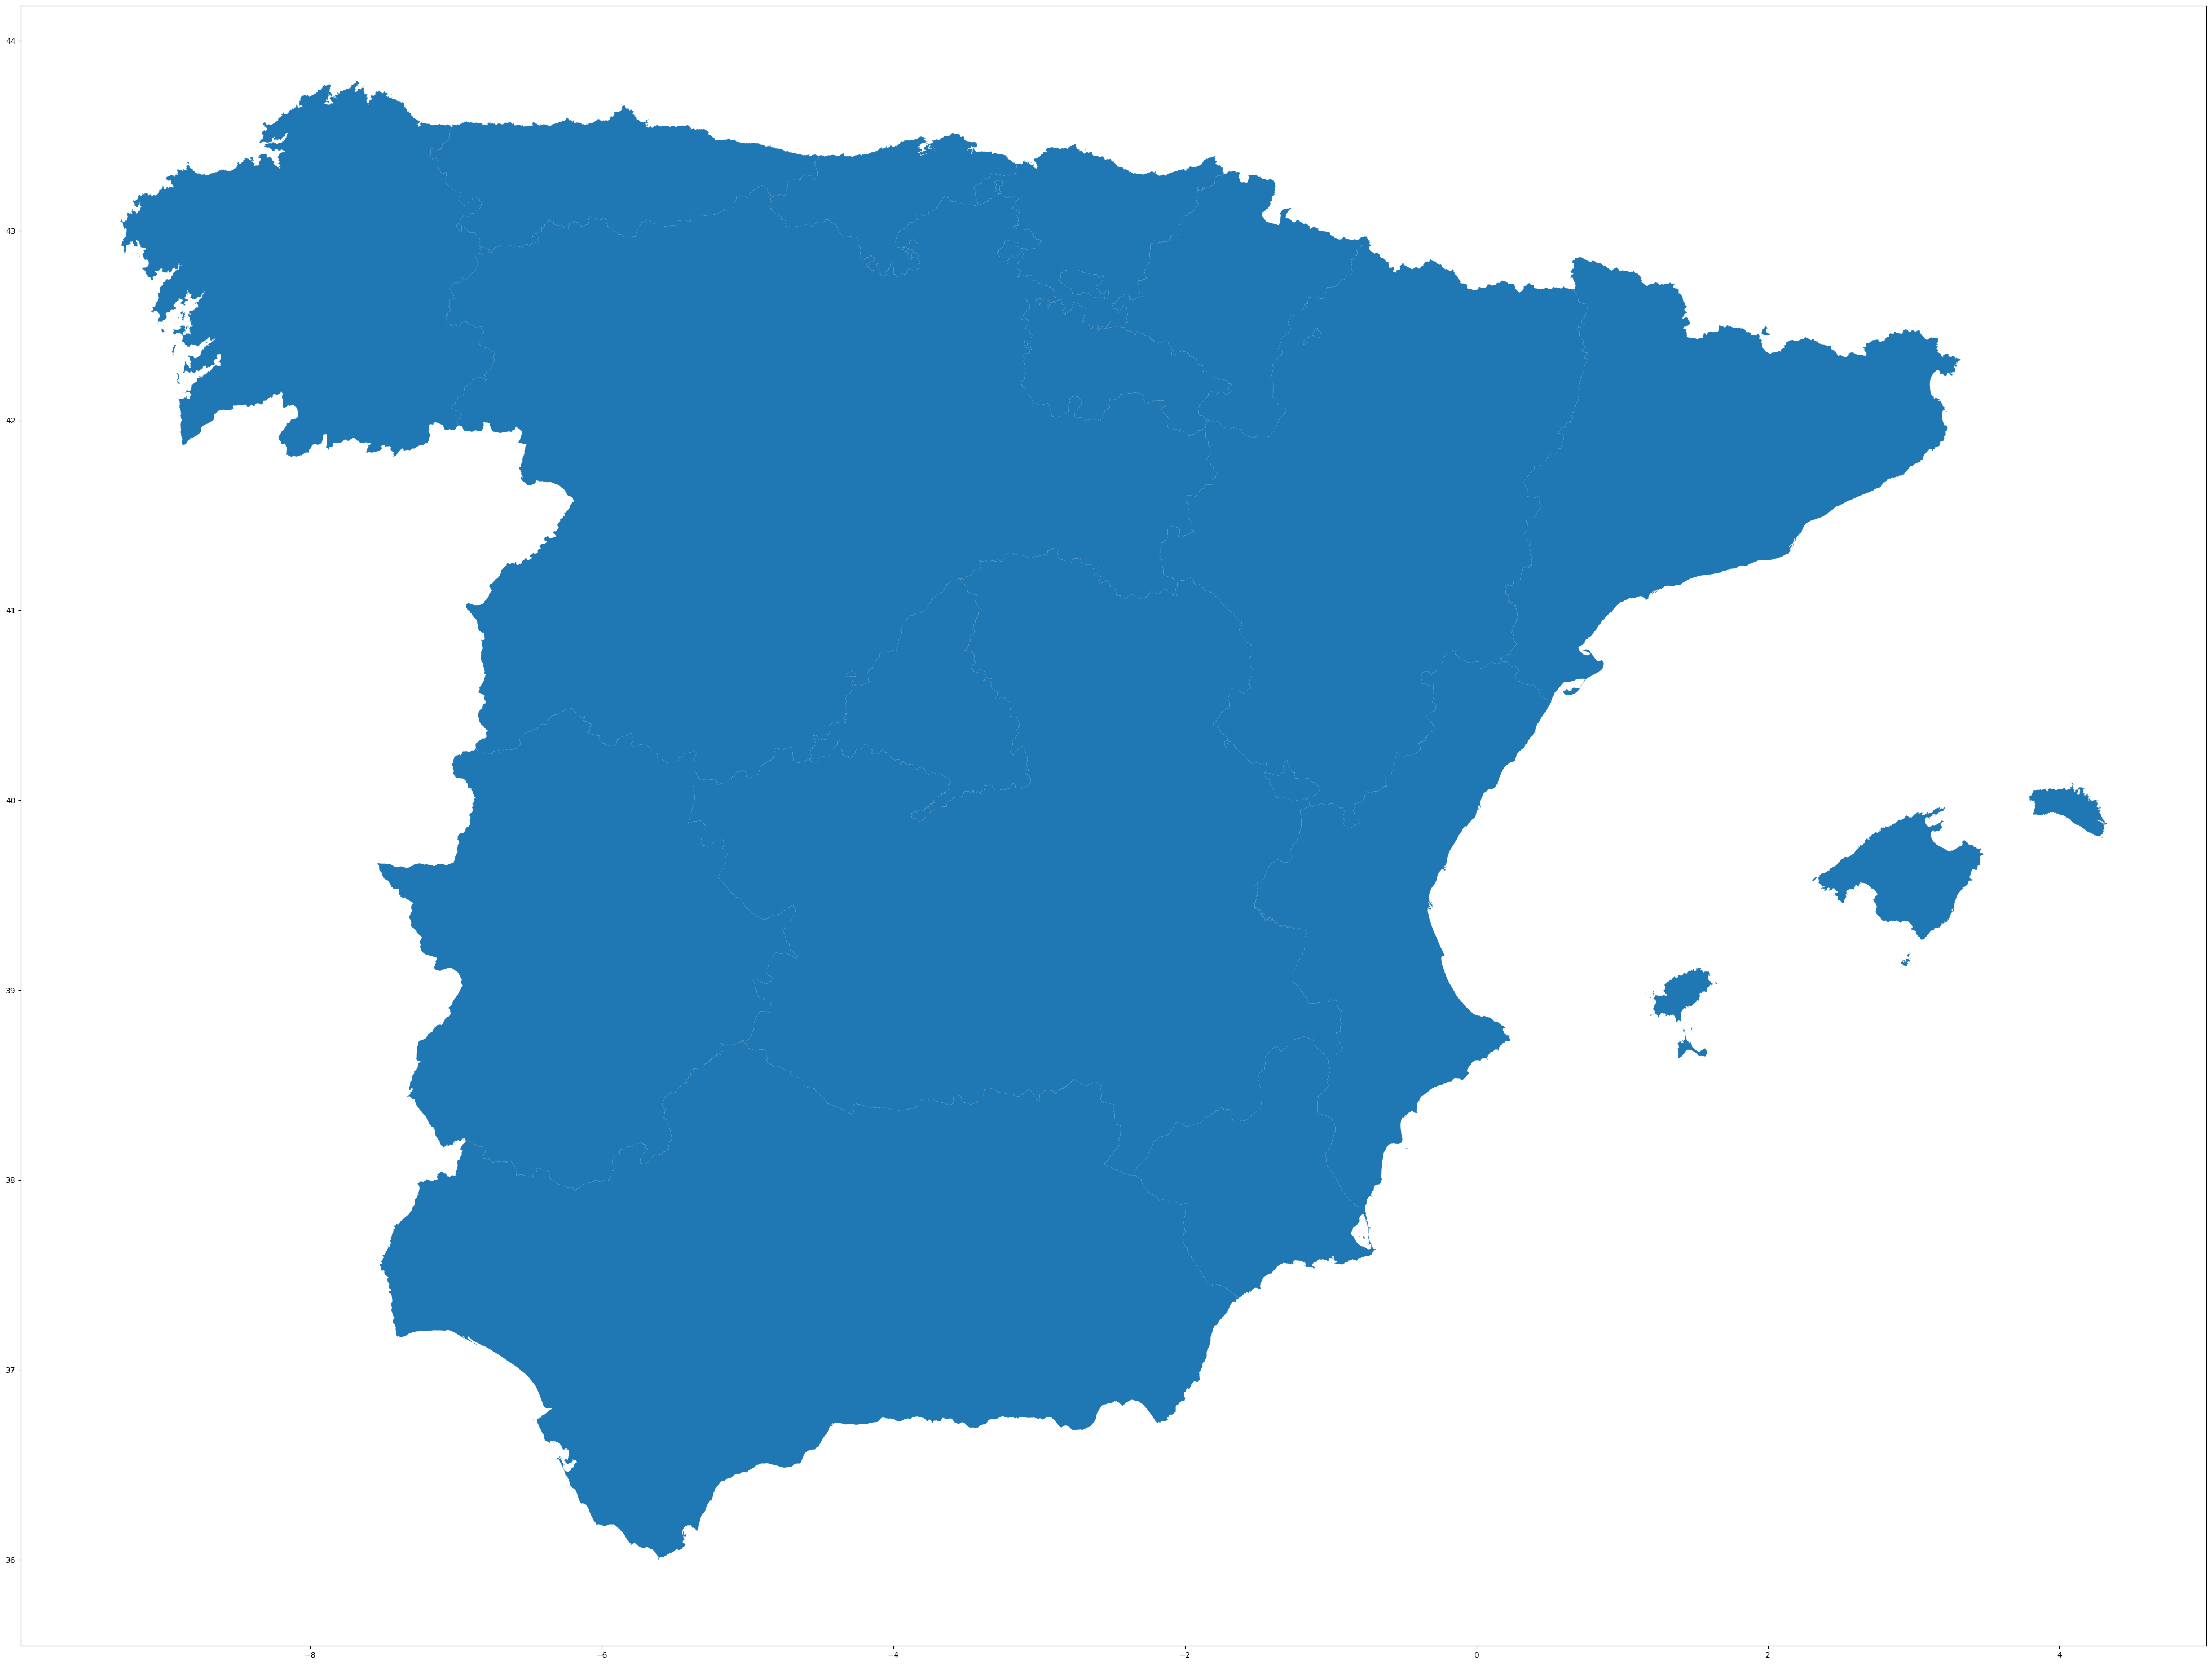

In [6]:
# resize the GeoDataframe plot
plt.rcParams['figure.figsize'] = [50, 70] #height, width

# plot the GeoDataframe of Mainland
shp_mainland.plot()

<AxesSubplot: >

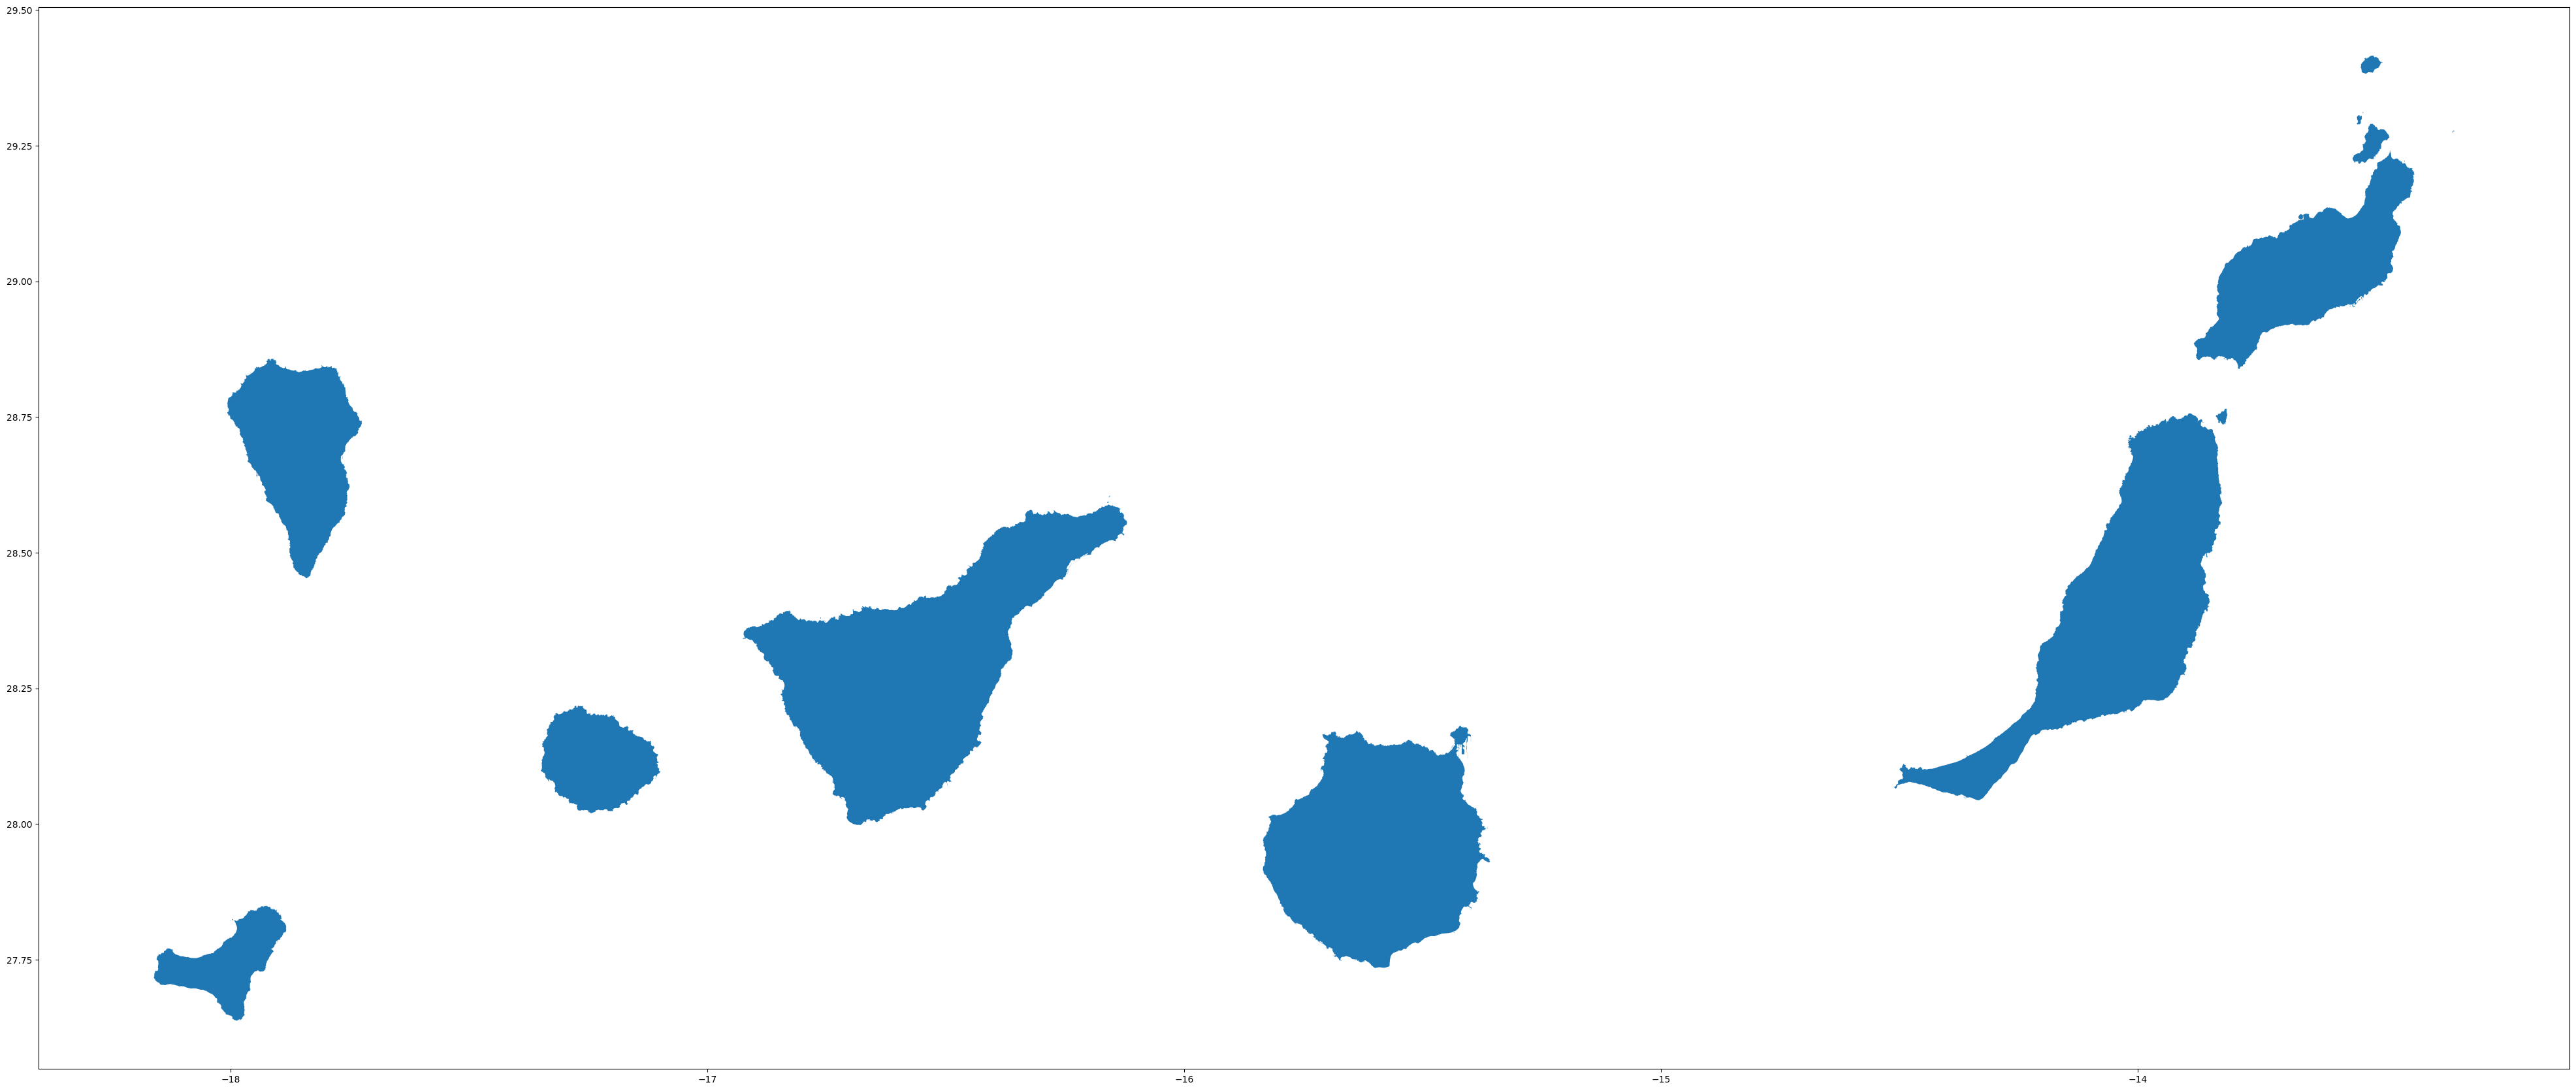

In [7]:
# plot the GeoDataframe of Mainland
shp_canarias.plot()

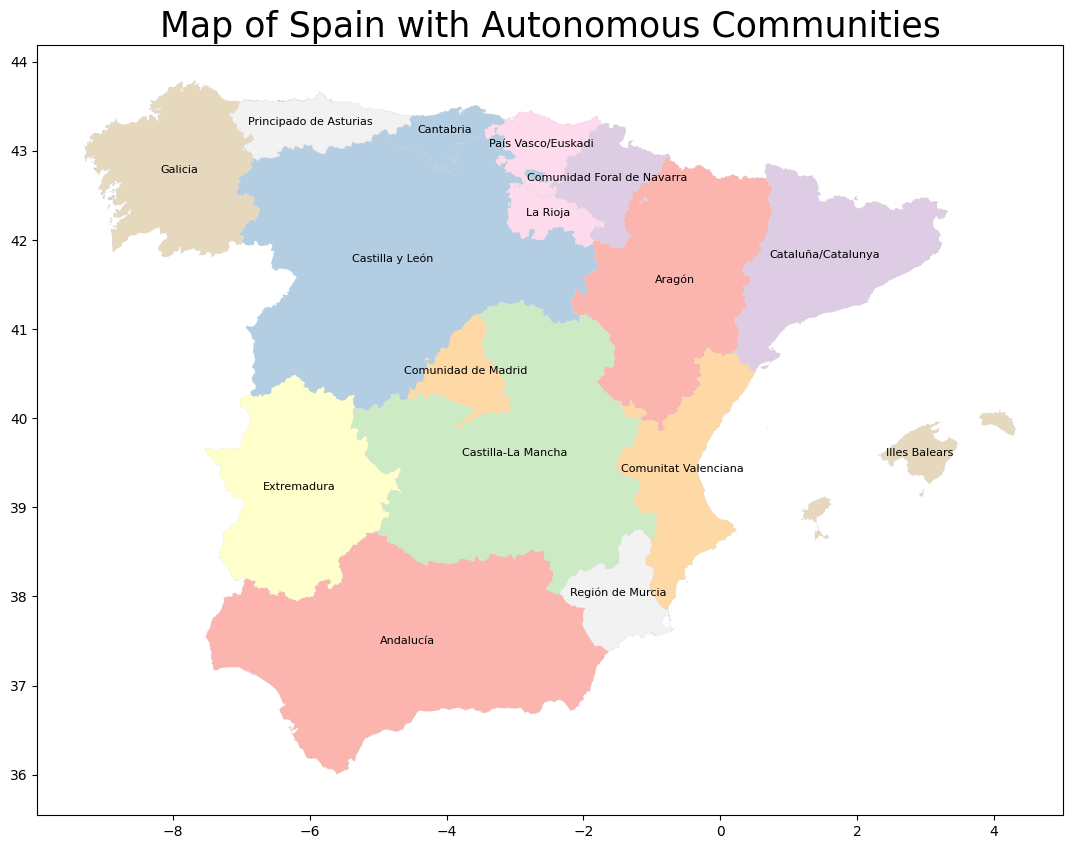

In [22]:
# set the value column that will be visualised
variable = 'text'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
#ax.axis('off')
# add a title and annotation
ax.set_title('Map of Spain with Autonomous Communities', fontdict={'fontsize': '25', 'fontweight' : '3'})
#ax.annotate('Source: OpenStreetMap (2021)', xy=(1, .04), xycoords='figure fraction', fontsize=12, color='#000000')
# create map
shp_mainland.apply(lambda x: ax.annotate(text=x['text'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='#000000'), axis=1, )
shp_mainland.plot(column=variable, cmap='Pastel1', linewidth=0.8, ax=ax, edgecolor='0.8',  lw = 0.1)
fig.savefig(cwd + "\interim\Figures\Map_SpainMainland", dpi='figure', bbox_inches='tight', pad_inches=.5)

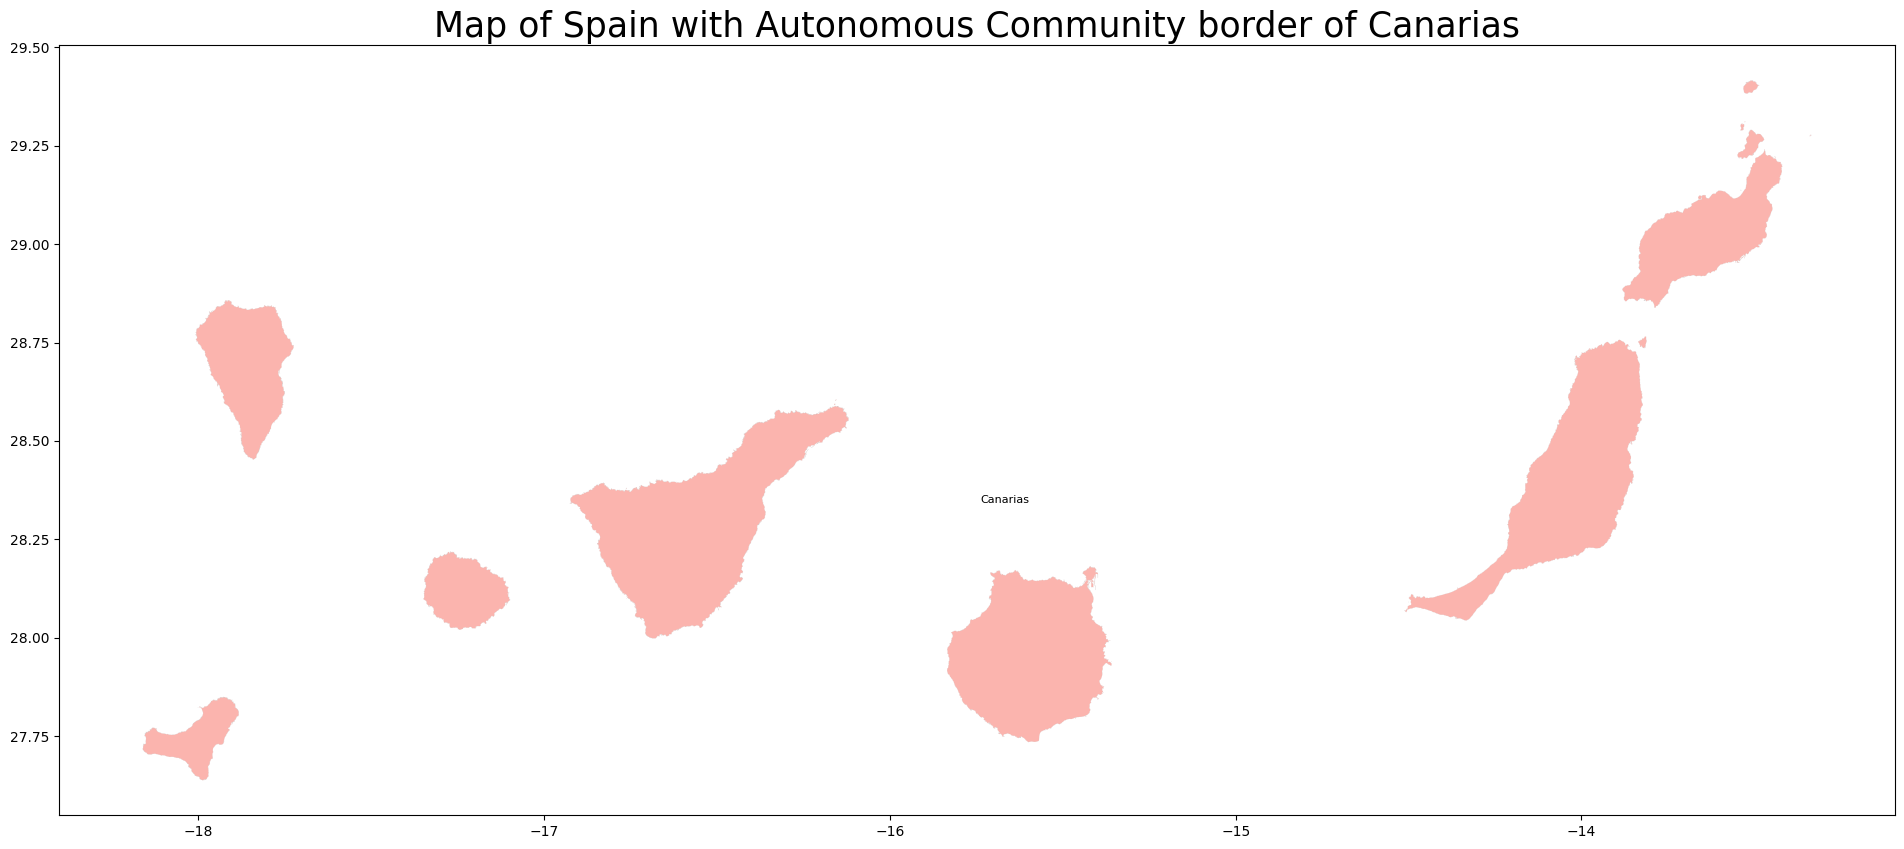

In [21]:
# set the value column that will be visualised
variable = 'text'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
#ax.axis('off')
# add a title and annotation
ax.set_title('Map of Spain with Autonomous Community border of Canarias', fontdict={'fontsize': '25', 'fontweight' : '3'})
#ax.annotate('Source: OpenStreetMap (2021)', xy=(0.54, .05), xycoords='figure fraction', fontsize=12, color='#000000')
# create map
shp_canarias.apply(lambda x: ax.annotate(text=x['text'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='#000000'), axis=1, )
shp_canarias.plot(column=variable, cmap='Pastel1', linewidth=0.8, ax=ax, edgecolor='0.8',  lw = 0.1)
fig.savefig(cwd + "\interim\Figures\Map_SpainCanarias", dpi='figure', bbox_inches='tight', pad_inches=.5)